# EvoDAG

Es un sistema de Programación Genética cuyo objetivo es resolver problemas de aprendizaje supervisado: clasificación y regresión. 

Para utilizarlo, el primer paso es instalarlo. Se puede utilizar alguno de los siguientes comandos:

__conda install -c ingeotec evodag__

__pip install EvoDAG__

Tip para instalarlo en windows: (1) ejecutar como administrador la aplicación "Anaconda Prompt" (2) teclear el primer comando "conda install -c ingeotec evodag" (3) seguir las instrucciones de instalación.

### Ejemplo: boston house-prices dataset (regression)

Más información en https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [1]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.feature_names)
X = data.data
y = data.target
print('X',X.shape)
print('y',len(y))
print()
print('Primer registro:',X[0],y[0])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
X (506, 13)
y 506

Primer registro: [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0


Separar los datos en dos conjuntos: entrenamiento (70%) y prueba (30%)

In [2]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)
print('Train',Xtrain.shape,len(ytrain))
print('Test',Xtest.shape,len(ytest))

Train (354, 13) 354
Test (152, 13) 152


Entrenar el modelo de EvoDAG

In [3]:
from EvoDAG.model import EvoDAGE
m = EvoDAGE(n_estimators=30, n_jobs=4,classifier=False).fit(Xtrain, ytrain)
hy = m.predict(Xtest)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.40it/s]


Medir el rendimiento del modelo 

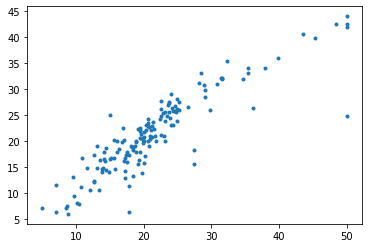

2.6369041830126374


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

plt.plot(ytest,hy,'.')
plt.show()
print(mean_absolute_error(ytest,hy))

Guardar los grafos del modelo de EvoDAG: m.graphviz( folder_destino )

Se puede copiar los valores de los archivos y pegarlos en la página: 
http://www.webgraphviz.com/

In [5]:
m.graphviz('EvoDAG_boston')

### Ejemplo: iris dataset (classification)

Más información en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
print(data.feature_names)
X = data.data
y = data.target
print('X',X.shape)
print('y',len(y))
print()
print('Primer registro:',X[0],y[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X (150, 4)
y 150

Primer registro: [5.1 3.5 1.4 0.2] 0


Separar los datos en dos conjuntos: entrenamiento (70%) y prueba (30%)

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)
print('Train',Xtrain.shape,len(ytrain))
print('Test',Xtest.shape,len(ytest))

Train (105, 4) 105
Test (45, 4) 45


Entrenar el modelo de EvoDAG

In [11]:
from EvoDAG.model import EvoDAGE
m = EvoDAGE(n_estimators=1, n_jobs=4,classifier=True).fit(Xtrain, ytrain)
hy = m.predict(Xtest)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Medir el rendimiento del modelo 

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest,hy))

0.9777777777777777


Guardar los grafos del modelo de EvoDAG: m.graphviz( folder_destino )

Se puede copiar los valores de los archivos y pegarlos en la página: http://www.webgraphviz.com/

In [13]:
m.graphviz('EvoDAG_iris')